# Preparation

Peparation biasa dilakukan untuk mempersiapkan data sebelum masuk dalam tahap pemodelan. <br>
Berikut adalah tahapan yang akan dilalui pada data `Cluster S1.csv` (sebuah data yang di-generate secara random) sebelum tahap pemodelan :
1. Import Library
2. Read Dataset
3. Pencarian Model CLuster Terbaik
4. Prosws Clustering

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import cluster
from sklearn.metrics import silhouette_score


In [ ]:
#Proses pembacaan data dari Sumber
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/cluster_s1.csv')
data.head()

,no,x,y
0,NaN,664159,550946
1,NaN,665845,557965
2,NaN,597173,575538
3,NaN,618600,551446
4,NaN,635690,608046


In [ ]:
#drop data yang tidak diperlukan perlu
data=data.drop('no', axis = 1)
data.head()

,x,y
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046


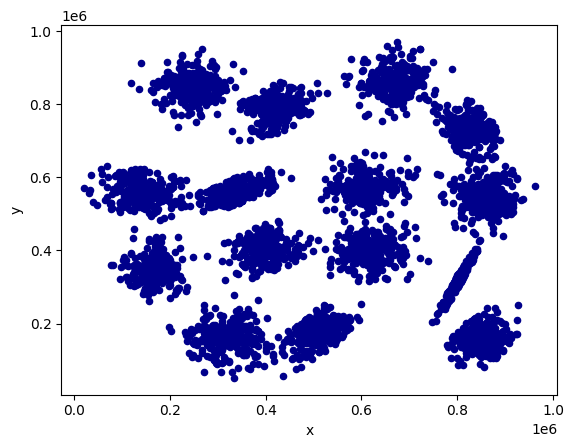

In [ ]:
#Lakukan Visualisasi
#Kita plot biar datanya terlihat

%matplotlib inline
ax1 = data.plot.scatter(x='x',y='y',c='DarkBlue')

### Lakukan segmentasi data dengan metode Clustering, metode yang digunakan bebas. Hasil akhir akan dievaluasi menggunakan fungsi silhouette score seperti contoh di bawah ini

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

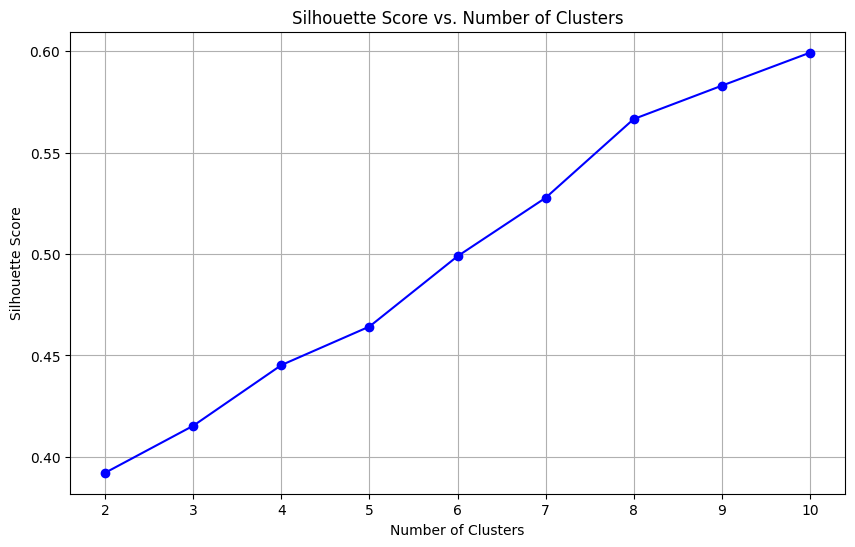

In [ ]:
#Lakukan Proses Pencarian CLuster terbaik untuk data diatas

#START CODE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Kumpulkan nilai silhouette score untuk berbagai jumlah cluster (misalnya, dari 2 hingga 10)
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot nilai silhouette score untuk masing-masing jumlah cluster
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()
#END CODE

In [ ]:
#Lengkapi Code di bawah ini sehingga menghasilkan evaluasi jumlah cluster terbaik
#Contoh pemanggilan Library CLustering
#from sklearn.cluster import KMeans

#START CODE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Range jumlah cluster yang akan diuji (misalnya, dari 2 hingga 10)
n_clusters_range = range(2, 11)

# Inisialisasi variabel untuk menyimpan nilai silhouette score terbaik dan jumlah cluster terbaik
best_silhouette_score = -1
best_n_clusters = None

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)

    # Memeriksa apakah silhouette score saat ini lebih baik dari yang sebelumnya
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_n_clusters = n_clusters
        best_labels = cluster_labels
#END CODE

print("Jumlah Cluster Terbaik:", best_n_clusters)
print("Silhouette Score Terbaik:", best_silhouette_score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Jumlah Cluster Terbaik: 10
Silhouette Score Terbaik: 0.5992416200674553


## Proses Visualisasi hasil CLuster

In [ ]:
#Proses Visualisasi hasil cluster

#Pertama, masukkan dahulu label hasil clustering ke dalam data

result = data.copy()

#START CODE
result['cluster'] = best_labels
result.head()
#END CODE

,x,y,cluster
0,664159,550946,2
1,665845,557965,2
2,597173,575538,2
3,618600,551446,2
4,635690,608046,2


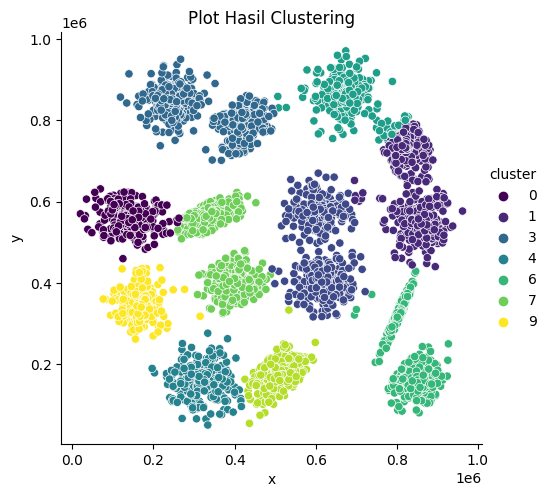

In [ ]:
#Lakukan Plotting terhadap data
import seaborn as sns

#Gunakan library seaborn, lebih mudah.

#START CODE
sns.relplot(data=result, x='x', y='y', hue='cluster', palette='viridis')
plt.title('Plot Hasil Clustering')
plt.show()
#END CODE